# Confidence Interval


Confidence interval is important and a part of statistics inference(*) and hypothesis testing. Confidence level refers to the percentage of probability, or certainty, that the confidence interval would contain the true population parameter when you draw a random sample many times (https://www.census.gov/programs-surveys/saipe/guidance/confidence-intervals.html).

Confidence Intervals is used to measure uncertainty in a sample variable.

Having 95% confidence intervals, means that we have a 5% chance of being wrong. It applies also with having 90% confidence intervals, we have a 10% chance of being wrong.

(*) statistics inference provides methods for drawing conclusions about a population from sample data.

Load libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load dataset "House"

In [2]:
df = pd.read_csv("house.csv", delimiter=',')
df

,bedroom_count,net_sqm,center_distance,metro_distance,floor,age,price
0,1,26.184098,1286.68,204.003817,22,67,96004.804557
1,1,34.866901,1855.25,186.980360,8,30,92473.722568
2,1,36.980709,692.09,111.224999,24,24,98112.519942
3,1,17.445723,1399.49,237.998760,1,66,92118.326874
4,1,52.587646,84.65,100.996400,20,3,98976.653176
...,...,...,...,...,...,...,...
4040,14,600.285032,499.92,84.714882,1,2,115050.425194
4041,14,242.912020,1408.20,94.257176,2,34,99862.768731
4042,14,381.986238,1600.48,175.757426,2,64,103316.062406
4043,17,750.971604,402.62,40.985933,1,80,118134.771190


Now we look at the metro_distance data

In [3]:
df_metro_distance = df['metro_distance']
df_metro_distance.describe()

count    4045.000000
mean       89.412340
std        71.000440
min      -168.492932
25%        39.283508
50%        89.031988
75%       140.493035
max       330.275317
Name: metro_distance, dtype: float64

Let us take out the mean of the metro_distance data.

In [4]:
mean_ = df_metro_distance.mean()
mean_

89.4123404543368

with Confidence Interval of 95% we have Z-score with value 1.96 <br>
The Z score tells us an estimate of the number of standard deviations that an observation lies from the mean

In [5]:
Z = 1.96

We would like to know the standard deviation of the entire dataset (population)

In [6]:
std = df_metro_distance.std()
print(std)

71.00043988585027


We take sample of 40% out of dataset (1600)

In [7]:
n = len(df_metro_distance[:1600])
print(n)

1600


Then calculate confidence interval

In [8]:
import math

left_side = mean_ - (Z * (std / math.sqrt(n)))
print(left_side)

85.93331889993014


In [9]:
right_side = mean_ + (Z * (std / math.sqrt(n)))
print(right_side)

92.89136200874346


The information above tells us that the true mean of metro distance would be in between 85.93 and 92.89 <br>
Let's plot this information.

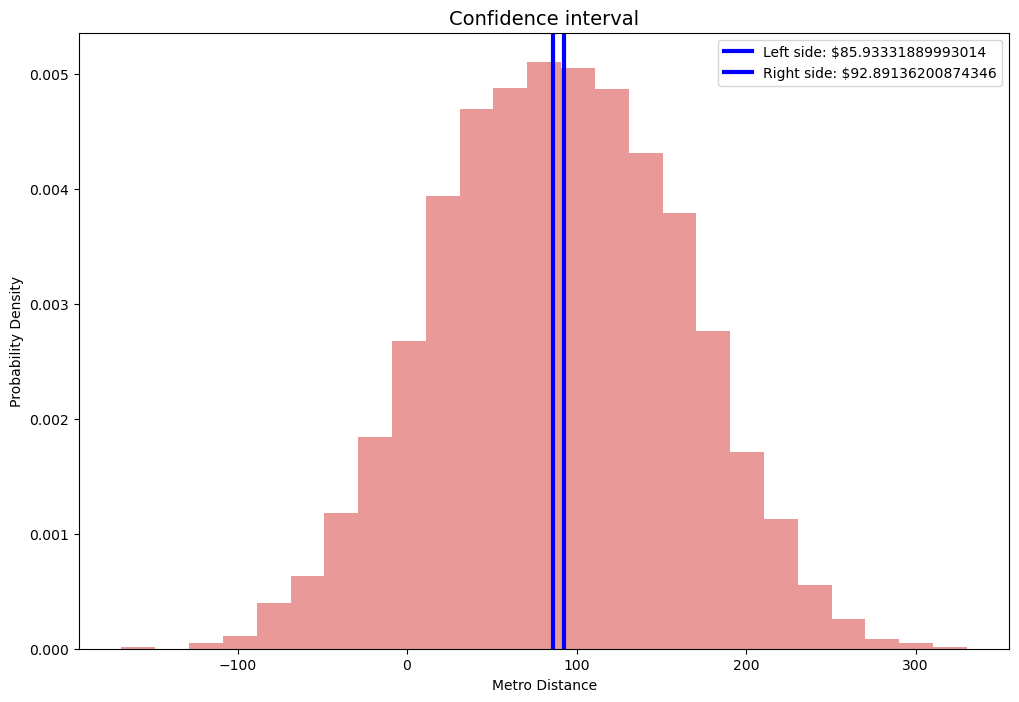

In [10]:
plt.figure(figsize=(12,8))
plt.hist(df_metro_distance, bins=25, density=True, alpha=0.6, color='#dc5656')

plt.axvline(left_side, color='blue',lw=3, label=f'Left side: ${left_side}')
plt.axvline(right_side, color='blue',lw=3, label=f'Right side: ${right_side}')

plt.xlabel('Metro Distance')
plt.ylabel('Probability Density')
plt.title('Confidence interval', fontsize=14)
plt.legend()